# Análisis de Sentimientos de Comentarios de TripAdvisor

Se extrajeron comentarios sobre tres hoteles importantes de Lima Metropolitana para analizar las preferencias de los clientes

#### Instalar Librerías

In [1]:
install.packages("syuzhet")
install.packages("RColorBrewer")
install.packages("wordcloud")
install.packages("tm")

also installing the dependencies ‘slam’, ‘textshape’, ‘NLP’, ‘dtt’


Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done

Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done

Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done

also installing the dependency ‘BH’


Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done



#### Activar las Librerías

In [2]:
library(syuzhet)
library(RColorBrewer)
library(wordcloud)
library(tm)

Loading required package: NLP



#### Cargar los Datos que se obtuvieron con Scraping

In [3]:
datos<-read.csv("TripAdvisor_Hoteles.csv", stringsAsFactors = F)
head(datos)

,Hotel,Id,Ciudad,Pais,Usuario,Rating,PosNeg,Fecha,Review
,<chr>,<chr>,<chr>,<chr>,<chr>,<int>,<int>,<chr>,<chr>
1,JW Marriott Hotel Lima,rn371531539,,,christopher c,5,1,09/05/2016,"El mejor hotel, bar surtido Excelente hotel, ambiente calido, sonrisas genuinas, para ser la primera vez que vengo al lobby bar del hotel nos trataron como si ya nos conocieran de tiempo, nos tomo la orden Erick Ayala fue muy gentil, super amable.. Nos recomendo unos deliciosos pisco sours que los preparo Pedro y estuvieron muy buenos. Comimos sushi y Erick nos conto un.."
2,JW Marriott Hotel Lima,rn371477476,Santiago,Chile,JLValdes73,4,1,09/05/2016,"Buen hotel, habitacion un poco oscura y humeda. Buen hotel, rico desayuno y comida, pleno Barrio de Miraflores a pocas cuadras del parque Kennedy y de Larco Mar. Solo un comentario con respecto a la habitacion que nos toco, algo oscura y humeda (era la ultima del pasillo del piso 5)."
3,JW Marriott Hotel Lima,rn371344377,,,Henry A,5,1,08/05/2016,"Servicio excepcional, impecable. Fui con mi novia a pasar un momento tranquilo al JW Marriott por recomendacion de mis amigos. Pase por el lobby bar del hotel. Me parecio un lugar tranquilo, tenian comidas excelentes y disfrute de los cocteles. Despues ordene un pollo Teriyaki y chilcanos, pero mas me llamo la atencion el servicio que me estaba brindando Erick Ayala, realmente una.."
4,JW Marriott Hotel Lima,rn371208412,Panama,Panama,maceitu,3,0,08/05/2016,"La vista es su fuerte La gran ventaja de este hotel es su vista inmejorable del Pacifico de Lima, la posibilidad de salir caminado por sus lindas aceras con vista al mar o cruzar la calle para pasear por el Larcomar, el shopping que esta justo al frente. De resto, no mi estilo de hotel. Turismo masivo, mucho ruido, mucha gente, musica a todo volumen.."
5,JW Marriott Hotel Lima,rn371197904,Kansas City,USA,jak201296,5,1,08/05/2016,"EL PISO 24 LO MEJOR DE LIMA Tuve la oportunidad de quedarme hace un par de dias en el hotel y quede muy complacido con las atenciones que recibi de parte de todos, pero en especial quiero mencionar al Sr. kem del salon vip del piso 24 ; quien nos atendio de manera tan especial que realmente nos hizo sentir como en nuestra propia casa. Tienen.."
6,JW Marriott Hotel Lima,rn371065386,Lima,Peru,Pietro F,4,1,07/05/2016,"Dia de la madre Restaurant La Vista, el Tea Time ofrece un excelente buffet, todo rico, comida sabrosa (local e internacional), gran variedad de platos incluyendo la zona de postres. El costo fue de S/. 59 por persona, lo vale. El servicio en el restaurant es muy bueno, sin embargo la limpieza en los servcios higienicos no es la optima para un hotel 5 estrellas."


#### utilizamos la función 'get_nrc_sentiment' para realizar el conteo de palabras correspondientes a cada una de las emociones de Plutchick

In [4]:
matsent <- get_nrc_sentiment(datos$Review, lang="spanish")

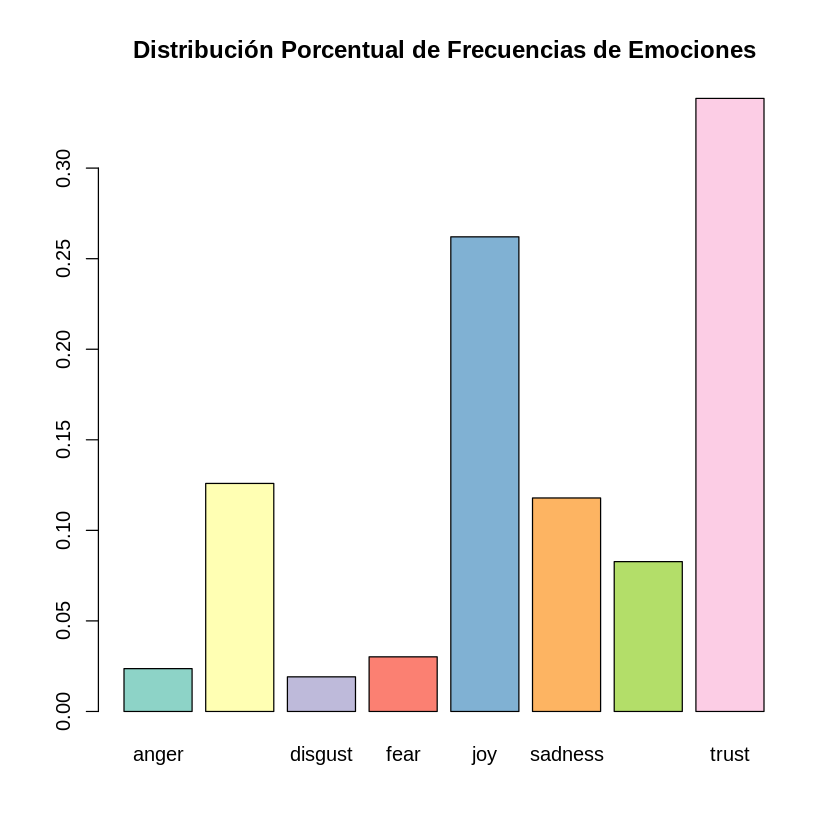

In [5]:
barplot(colSums(prop.table(matsent[, 1:8])),
  col = brewer.pal(n = 8, name = "Set3"),
  main = "Distribución Porcentual de Frecuencias de Emociones")

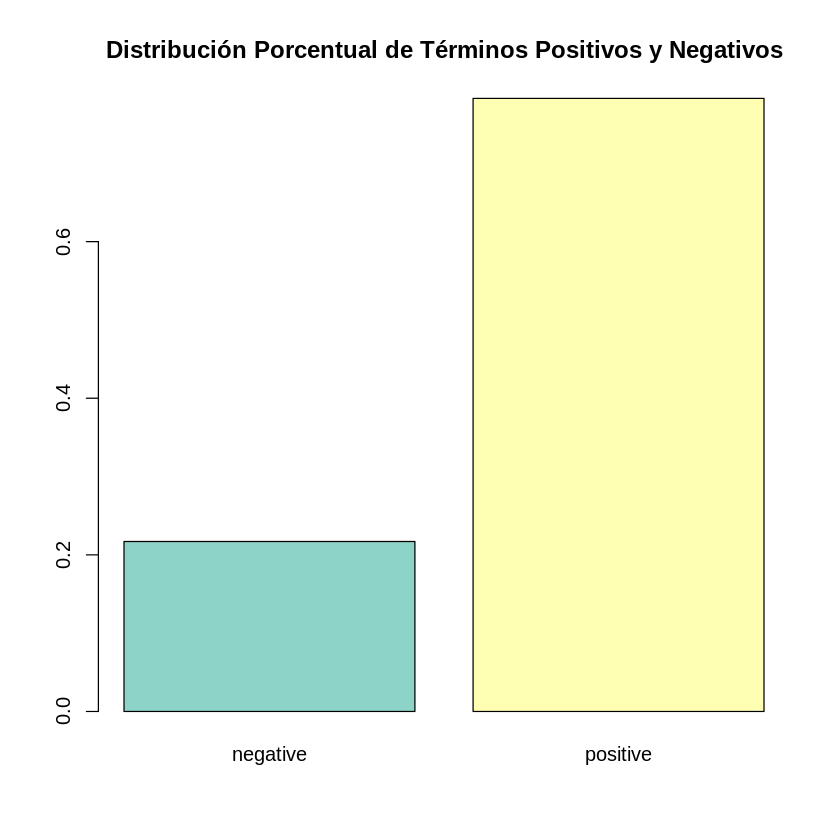

In [6]:
barplot(colSums(prop.table(matsent[, 9:10])),
  col = brewer.pal(n = 8, name = "Set3"),
  main = "Distribución Porcentual de Términos Positivos y Negativos")

#### Calculamos un índice de Positividad del Comentario

In [7]:
matsent$Prop <- matsent$positive/(matsent$positive+matsent$negative)
head(matsent)

,anger,anticipation,disgust,fear,joy,sadness,surprise,trust,negative,positive,Prop
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,0,1,0,0,2,1,0,2,1,4,0.8000000
2,0,0,0,0,1,0,0,1,1,3,0.7500000
3,0,1,0,1,3,1,0,3,1,6,0.8571429
4,2,2,0,1,0,2,0,0,4,5,0.5555556
5,0,1,0,0,1,1,1,0,1,3,0.7500000
6,1,2,0,0,4,2,1,5,4,10,0.7142857


#### Unimos los dos DataFrames para tener la información completa

In [8]:
datos <- data.frame(datos,matsent)
head(datos)

,Hotel,Id,Ciudad,Pais,Usuario,Rating,PosNeg,Fecha,Review,anger,anticipation,disgust,fear,joy,sadness,surprise,trust,negative,positive,Prop
,<chr>,<chr>,<chr>,<chr>,<chr>,<int>,<int>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,JW Marriott Hotel Lima,rn371531539,,,christopher c,5,1,09/05/2016,"El mejor hotel, bar surtido Excelente hotel, ambiente calido, sonrisas genuinas, para ser la primera vez que vengo al lobby bar del hotel nos trataron como si ya nos conocieran de tiempo, nos tomo la orden Erick Ayala fue muy gentil, super amable.. Nos recomendo unos deliciosos pisco sours que los preparo Pedro y estuvieron muy buenos. Comimos sushi y Erick nos conto un..",0,1,0,0,2,1,0,2,1,4,0.8000000
2,JW Marriott Hotel Lima,rn371477476,Santiago,Chile,JLValdes73,4,1,09/05/2016,"Buen hotel, habitacion un poco oscura y humeda. Buen hotel, rico desayuno y comida, pleno Barrio de Miraflores a pocas cuadras del parque Kennedy y de Larco Mar. Solo un comentario con respecto a la habitacion que nos toco, algo oscura y humeda (era la ultima del pasillo del piso 5).",0,0,0,0,1,0,0,1,1,3,0.7500000
3,JW Marriott Hotel Lima,rn371344377,,,Henry A,5,1,08/05/2016,"Servicio excepcional, impecable. Fui con mi novia a pasar un momento tranquilo al JW Marriott por recomendacion de mis amigos. Pase por el lobby bar del hotel. Me parecio un lugar tranquilo, tenian comidas excelentes y disfrute de los cocteles. Despues ordene un pollo Teriyaki y chilcanos, pero mas me llamo la atencion el servicio que me estaba brindando Erick Ayala, realmente una..",0,1,0,1,3,1,0,3,1,6,0.8571429
4,JW Marriott Hotel Lima,rn371208412,Panama,Panama,maceitu,3,0,08/05/2016,"La vista es su fuerte La gran ventaja de este hotel es su vista inmejorable del Pacifico de Lima, la posibilidad de salir caminado por sus lindas aceras con vista al mar o cruzar la calle para pasear por el Larcomar, el shopping que esta justo al frente. De resto, no mi estilo de hotel. Turismo masivo, mucho ruido, mucha gente, musica a todo volumen..",2,2,0,1,0,2,0,0,4,5,0.5555556
5,JW Marriott Hotel Lima,rn371197904,Kansas City,USA,jak201296,5,1,08/05/2016,"EL PISO 24 LO MEJOR DE LIMA Tuve la oportunidad de quedarme hace un par de dias en el hotel y quede muy complacido con las atenciones que recibi de parte de todos, pero en especial quiero mencionar al Sr. kem del salon vip del piso 24 ; quien nos atendio de manera tan especial que realmente nos hizo sentir como en nuestra propia casa. Tienen..",0,1,0,0,1,1,1,0,1,3,0.7500000
6,JW Marriott Hotel Lima,rn371065386,Lima,Peru,Pietro F,4,1,07/05/2016,"Dia de la madre Restaurant La Vista, el Tea Time ofrece un excelente buffet, todo rico, comida sabrosa (local e internacional), gran variedad de platos incluyendo la zona de postres. El costo fue de S/. 59 por persona, lo vale. El servicio en el restaurant es muy bueno, sin embargo la limpieza en los servcios higienicos no es la optima para un hotel 5 estrellas.",1,2,0,0,4,2,1,5,4,10,0.7142857


#### Exportamos para generar reportes y otros análisis

In [9]:
write.csv(datos, "Hoteles_Clasificados.csv")

## Visualización de Wordcloud
#### Convertimos el tipo de Objeto de la Columna 'Review'

In [10]:
docs <- Corpus(VectorSource(datos[9]))

#### Removemos Stopwords o términos no relevantes

In [11]:
docs <- tm_map(docs, removeWords, stopwords("spanish"))

Warning message in tm_map.SimpleCorpus(docs, removeWords, stopwords("spanish")):
“transformation drops documents”


In [12]:
docs <- tm_map(docs, removeWords, c("hotel"))

Warning message in tm_map.SimpleCorpus(docs, removeWords, c("hotel")):
“transformation drops documents”


#### Calculamos las frecuencias de cada Término

In [13]:
dtm <- DocumentTermMatrix(docs)
freq <- sort(colSums(as.matrix(dtm)), decreasing=TRUE)

#### Dibujamos el WordCloud

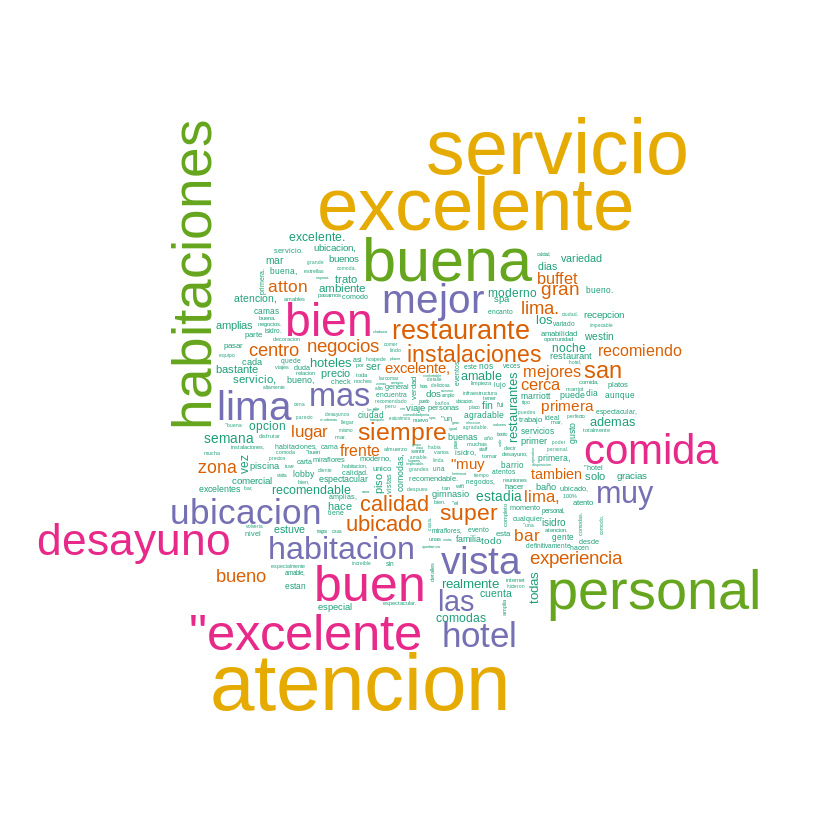

In [14]:
set.seed(2000)
wordcloud(names(freq), freq, min.freq=30, scale=c(4, .05), colors=brewer.pal(6, "Dark2"))

Elaborado por Luis Cajachahua bajo licencia MIT (2024)